In [5]:
import sys
print (sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


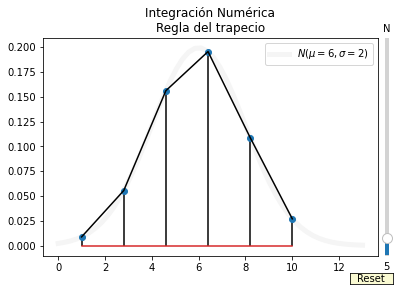

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  3 10:26:20 2022

@author: Daysi Velecela
"""

from statistics import NormalDist
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button

f = NormalDist(mu=6, sigma=2)

xs = np.linspace(0, 13)
ys = np.array(list(map(f.pdf, xs)))

#%matplotlib qt
a, b = 1, 10
N = 5
h = (b-a)/N
x_i = np.linspace(a, b, N+1)
f_i = list(map(f.pdf, x_i))

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
plt.plot(xs, ys, color='whitesmoke', lw=5, label='$N(\mu=6, \sigma=2)$')
plt.legend()
plt.title('Integración Numérica\nRegla del trapecio')
stems = plt.stem(x_i, f_i, linefmt='k-')
line, = plt.plot(x_i, f_i, color='k')

axcolor = 'lightgoldenrodyellow'
# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.91, 0.125, 0.0225, 0.755], facecolor=axcolor)
amp_slider = Slider(
    ax=axamp,
    label="N",
    valmin=1,
    valmax=50,
    valinit=5,
    valstep=1,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    N = int(amp_slider.val)
    h = (b-a)/N
    x_i = np.linspace(a, b, N+1)
    f_i = list(map(f.pdf, x_i))
    stems[0].set_xdata(x_i) # 0 son los puntitos
    stems[0].set_ydata(f_i)
    stems[1].set_paths([np.array([[x, 0], [x, y]]) for (x, y) in zip(x_i, f_i)])
    stems[2].set_xdata([np.min(x_i), np.max(x_i)]) # 2 es la línea horizontal de la base de los stems
    line.set_xdata(x_i)
    line.set_ydata(f_i)
    fig.canvas.draw_idle()


# register the update function with each slider
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.835, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    amp_slider.reset()
    
button.on_clicked(reset)

plt.show()

In [35]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan  5 17:15:23 2022

@author: Josue
"""
from tkinter import *
import tkinter.font as tkFont
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from math import *
from sympy import *

ventana = Tk()
ventana.geometry('1366x768')
ventana.title('Integrales')
ventana.config(bg='#2a8d90')


def graficar(val='1'):
    """
    Grafico de f(x), 
    """
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    val = int(val)
    m_ = variador_de_frecuencia.get()
    H=abs((a1-b1)/m_)
    print('valor de m:',m_)
    print('valor de h:',H)
    y = []
    yp = []
    funcion = txt_entrada.get()
    x_arr = (np.arange(a1,b1,0.1)).tolist()
    x_arrp = (np.arange(a1,b1+H,H)).tolist()
    for x in x_arr:                                               
        y.append(eval(funcion))
    
    for x in x_arrp:                                               
        yp.append(eval(funcion))
    
    
    canvas_funcion_inicial = FigureCanvasTkAgg(funcion_inicial, ventana)
    canvas_funcion_inicial.get_tk_widget().grid(row=3, column=0)
    
    tbl=Frame(ventana)
    tbl.place(x=0,y=220)
    tb=NavigationToolbar2Tk(canvas_funcion_inicial,tbl)

    grafica_funcion_inicial.clear()
    grafica_funcion_inicial.set_title("FUNCION f(x)",fontweight='bold',color='r',fontsize=20)
    grafica_funcion_inicial.plot(x_arr,y,label='Función',color='b')
    grafica_funcion_inicial.grid(True, which='both')
    grafica_funcion_inicial.scatter(x_arrp,yp,label='Datos',color='r')
    grafica_funcion_inicial.legend()
    grafica_funcion_inicial.grid(True, which='both')
    grafica_funcion_inicial.axhline(y=0, color='k')
    grafica_funcion_inicial.axvline(x=0, color='k')
    
    dif_progresiva(np.array(yp), H)
    #return x_arrp,H

def dif_progresiva(ys,h):
    """
    
    """
    ys1=ys
    h1=h
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    
    m_ = variador_de_frecuencia.get()
    H=abs((a1-b1)/m_)
    res=[]
    for i in range(len(ys)-1):
        s=(ys[i+1]-ys[i])/h
        res.append(s)
        
    x_pro=(np.arange(a1,b1,H)).tolist()
    #print('x:',len(x_pro))
    #print('y:',len(res))
    
    if len(x_pro) > len(res):
        x_pro.pop()
    if len(x_pro) < len(res):
        res.pop()
    
    canvas_funcion_diferencial = FigureCanvasTkAgg(funcion_diferencial,ventana)
    canvas_funcion_diferencial.get_tk_widget().place(x=400,y=400)
    
    tbl1=Frame(ventana)
    tbl1.place(x=0,y=550)
    tb1=NavigationToolbar2Tk(canvas_funcion_diferencial,tbl1)
    
    grafica_funcion_diferencial.clear()
    grafica_funcion_diferencial.set_title("DERIVADAS",fontweight='bold',color='r',fontsize=20)
    grafica_funcion_diferencial.plot(x_pro,res,
                                     label='$\delta$+q dif.fin.progresiva',
                                     color='b',marker='*')
    grafica_funcion_diferencial.legend()
    grafica_funcion_diferencial.grid(True, which='both')
    grafica_funcion_diferencial.axhline(y=0, color='k')
    grafica_funcion_diferencial.axvline(x=0, color='k')
    dif_regresiva(np.array(ys1),h1)  
    #return res
    
def dif_regresiva(ys,h):
    """
    
    """
    ys2=ys
    h2=h
    res1=[]
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    m_ = variador_de_frecuencia.get()
    H=abs((a1-b1)/m_)
    s1=H
    
    #print(type(m1))
    if a1 < 0 or a1 == 0:
        s1=+H
    else:
        s1=+H
    for i in range(1,len(ys)):

        res1.append((ys[i]-ys[i-1])/h)
        
    x_re=(np.arange(a1+s1,b1+0.1,H)).tolist()
    #print ('x:',len(x_re))
    #print('y:',len(res1))
    
    if len(x_re) > len(res1):
        x_re.pop()
    if len(x_re) < len(res1):
        res1.pop()
    
    grafica_funcion_diferencial.plot(x_re,res1,
                                     label='$\delta$-q dif.fin.regresiva',
                                     color='r',marker='X')
    grafica_funcion_diferencial.legend()
    
    dif_centrada(ys2, h2)

    #return res1

def dif_centrada(ys,h):
    """
    
    """
    res2=[]
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    m_ = variador_de_frecuencia.get()
    H=abs((a1-b1)/m_)
    s1=H
    
    if a1 < 0 or a1 == 0:
        s1=+H
    else:
        s1=+H
        
    for i in range(1,len(ys)-1):
        res2.append((ys[i+1]-ys[i-1])/(2*h))
        
    x_cen = (np.arange(a1+s1,b1,H)).tolist()
    #print ('x:',len(x_cen))
    #print('y:',len(res2))
    
    if len(x_cen) > len(res2):
        x_cen.pop()
    if len(x_cen) < len(res2):
        res2.pop()
        
    grafica_funcion_diferencial.plot(x_cen,res2,
                                     label='$\delta$q dif.fin.centrada',
                                     color='g',marker='o')
    grafica_funcion_diferencial.legend()
    derivar()
    
    #return res2

def derivar():
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    x= symbols('x')
    fun_escrita = txt_entrada.get()
    f= parse_expr(fun_escrita)
    derivada = diff(f,x)
    print('Derivada:',derivada)
    x_der = (np.arange(a1,b1+0.1,0.1)).tolist()
    y_der = []
    for x in x_der:
        y_der.append(eval(str(derivada)))
    grafica_funcion_diferencial.plot(x_der,y_der,label='Derivada',color='m',linestyle='--')
    grafica_funcion_diferencial.legend()
    
    #H=val_m(v='2')
    #print('valor de h:',H)
    
    return derivada
#--------------------------------------------------------------------------------------------------------------------------------
# botones

boton1=Button(ventana,text="Calcular",padx=100,pady=0,bg='lightgray',fg='red',command=graficar,font=('Helvetica',12))
boton1.grid(padx=5,pady=6) #ubicacion del botton


# Etiquetas
a = Label(ventana,text='a:',bg='#2a8d90',fg='black',font=('Arial',12,'bold')).place(x=10,y=37)
b = Label(ventana,text='b:',bg='#2a8d90',fg='black',font=('Arial',12,'bold')).place(x=210,y=37)
f = Label(ventana,text='Función:',bg='#2a8d90',fg='black',font=('Arial',12,'bold')).place(x=70,y=7)  #x=800,y=45
m = Label(ventana,text='M',bg='#2a8d90',fg='black',font=('Arial',15,'bold')).place(x=1600,y=130)


# Cuadros de texto de entrada
txt_entrada = Entry(ventana,bg='gray69') # Entrada de la función
txt_entrada.insert(END,'x**2')
#'2*cos(2*10*pi*x)+cos(2*pi*(10/2)*x)'
#txt_entrada.grid( padx=5, pady=5)  # creo que padx, y pady es desde los lados que mueve
txt_entrada.place(x=150,y=10)

txt_a = Entry(ventana,bg='gray69') # Entrada lim -inferior
txt_a.insert(END,'-15')
txt_a.place(x=31,y=39) 

txt_b = Entry(ventana,bg='gray69') # Entrada lim -superior
txt_b.insert(END,'15')
txt_b.place(x=232,y=40) 


# Graficas
funcion_inicial = Figure(figsize=(6.4, 4.8),facecolor='#2a8d90')#largo y algo de grafico
grafica_funcion_inicial = funcion_inicial.add_subplot(111)
grafica_funcion_inicial.set_title("FUNCION f(x)",fontweight='bold',color='r',fontsize=20)
#grafica_funcion_inicial.plot([], [])

funcion_diferencial = Figure(figsize=(6.4, 4.8),facecolor='#2a8d90')
grafica_funcion_diferencial = funcion_diferencial.add_subplot(111)
grafica_funcion_diferencial.set_title("DERIVADAS",fontweight='bold',color='r',fontsize=20)
#grafica_funcion_diferencial.plot([], [])


# Insertando las graficas en la interfaz
canvas_funcion_inicial = FigureCanvasTkAgg(funcion_inicial, ventana)
canvas_funcion_diferencial = FigureCanvasTkAgg(funcion_diferencial, ventana)

# Scroll
variador_de_frecuencia = Scale(ventana, from_=1, to=100,bg='#2a8d90',
                               length=500,tickinterval=9,command=graficar)
variador_de_frecuencia.place(x=200,y=160) #posisicon del scroll


# Cuadros de graficas
canvas_funcion_inicial.get_tk_widget().grid(row=3, column=0)
canvas_funcion_diferencial.get_tk_widget().grid(padx=10,pady=0)


ventana.mainloop()

valor de m: 1
valor de h: 30.0
Derivada: 2*x


In [167]:
def graficarTrapecio(val='1'):
    """
    Grafico de f(x), 
    """
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    val = int(val)
    m_ = variador_de_frecuencia.get()
    H=abs((a1-b1)/m_)
    funcion = txt_entrada.get()
    x_i = np.linspace(a1, b1, m_+1)    
    f_i = []
    #list(map(eval(funcion), x_i))
    for x in x_i:                                               
        f_i.append(eval(funcion))    
    
    
    #fig.canvas.draw_idle()
    
    tbl=Frame(ventana)
    tbl.place(x=0,y=220)
    tb=NavigationToolbar2Tk(canvas_funcion_trapecio,tbl)
    
    grafica_funcion_trapecio.clear()
    grafica_funcion_trapecio.set_title("Trapecio",fontweight='bold',color='black',fontsize=15)
    grafica_funcion_trapecio.plot(x_i,f_i,label='Función',color='b')        
    grafica_funcion_trapecio.text(a1+0.5,f_i[0]-0.5, 'Integral:'+ str(round(calculateTrapecio(a1,b1,H,m_,funcion),2)),verticalalignment='center', fontsize=10,  color='red')
    grafica_funcion_trapecio.legend()
    stems = grafica_funcion_trapecio.stem(x_i, f_i, linefmt='k-')
    line, = grafica_funcion_trapecio.plot(x_i, f_i, color='k')
    
    #stems[0].set_xdata(x_i) # 0 son los puntitos
    #stems[0].set_ydata(f_i)
    #stems[1].set_paths([np.array([[x, 0], [x, y]]) for (x, y) in zip(x_i, f_i)])
    #stems[2].set_xdata([np.min(x_i), np.max(x_i)]) # 2 es la línea horizontal de la base de los stems
    #line.set_xdata(x_i)
    #line.set_ydata(f_i)
    grafica_funcion_trapecio.set_xlim([a1-2, b1+2])
    funcion_trapecio.canvas.draw_idle()
    
    #funcion_trapecio.canvas.flush_events()
    #grafica_funcion_trapecio.grid(True, which='both')
    #grafica_funcion_trapecio.axhline(y=0, color='k')
    #grafica_funcion_trapecio.axvline(x=0, color='k')
    return x_i,f_i

In [177]:
def graficar(val='1'):
    graficarTrapecio(val)
    graficarPunto(val)
    graficarError(val)

In [178]:
def graficarPunto(val='1'):
    """
    Grafico de f(x), 
    """
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    val = int(val)
    m_ = variador_de_frecuencia.get()
    
    H=abs((a1-b1)/m_)    
    funcion = txt_entrada.get()
    
    x_i, f_i ,suma = calculatePunto(a1,b1,H,m_,funcion)
    
    tbl=Frame(ventana)
    tbl.place(x=0,y=220)
    tb=NavigationToolbar2Tk(canvas_funcion_punto_medio,tbl)
    
    grafica_funcion_punto_medio.clear()
    grafica_funcion_punto_medio.set_title("Punto medio",fontweight='bold',color='black',fontsize=15)
    grafica_funcion_punto_medio.plot(x_i,f_i,label='Función',color='b')    
    grafica_funcion_punto_medio.text(a1+0.5,f_i[0]-0.5, 'Integral:'+ str(round(suma,2)),verticalalignment='center', fontsize=10,  color='red')
    grafica_funcion_punto_medio.legend()
    
    f_rectangule = []
    x_rectangule = []
    #print(H)
    #x_i_new = np.linspace(a1-H, b1+H, 3**m_)
    #print(x_i_new)
    
    #list(map(eval(funcion), x_i))
    for x in x_i:    
        x_rectangule.append(x-(H/2))
        f_rectangule.append(eval(funcion))
        x_rectangule.append(x)
        f_rectangule.append(eval(funcion))
        x_rectangule.append(x+(H/2))
        f_rectangule.append(eval(funcion))
    
    line, = grafica_funcion_punto_medio.plot( x_rectangule, f_rectangule, color='grey')
    stems1 = grafica_funcion_punto_medio.stem(x_rectangule, f_rectangule, linefmt='grey')
    #stems[2].set_xdata(x_rectangule)
    #stems[2].set_ydata(f_rectangule)
    
    stems = grafica_funcion_punto_medio.stem(x_i, f_i, linefmt='k--', markerfmt='Dr')
    
    grafica_funcion_punto_medio.set_xlim([a1-2, b1+2])
    funcion_punto_medio.canvas.draw_idle()
    
    #funcion_trapecio.canvas.flush_events()
    #grafica_funcion_trapecio.grid(True, which='both')
    #grafica_funcion_trapecio.axhline(y=0, color='k')
    #grafica_funcion_trapecio.axvline(x=0, color='k')
    return x_i,f_i

In [183]:
def graficarError(val='1'):
    a1=int(txt_a.get())
    b1=int(txt_b.get())
    val = int(val)
    #m_ = variador_de_frecuencia.get()
    funcion = txt_entrada.get()
    
    x_punto = []
    y_punto = []
    
    x_trapecio = []
    y_trapecio = []    
    for m_ in range(2,101): # get H range
        H=abs((a1-b1)/m_)
        x_punto.append(H)
        x_trapecio.append(H)
        
        d1,d2,area_punto = calculatePunto(a1,b1,H,m_,funcion)
        area_trapecio = calculateTrapecio(a1, b1,H,m_,funcion)
        
        y_punto.append(area_punto)
        y_trapecio.append(area_trapecio)
        
    tbl=Frame(ventana)
    tbl.place(x=0,y=220)
    tb=NavigationToolbar2Tk(canvas_funcion_error,tbl)
    
    grafica_funcion_error.clear()
    grafica_funcion_error.set_title("Error",fontweight='bold',color='black',fontsize=15)
    grafica_funcion_error.plot(x_punto,y_punto,label='Punto medio',color='b')    
    grafica_funcion_error.plot(x_trapecio,y_trapecio,label='Trapecio',color='r')
    
    grafica_funcion_error.legend()
    funcion_error.canvas.draw_idle()
        

In [180]:
def calculatePunto(a1,b1,H,m_,funcion):
    x_i = np.linspace(a1, b1, m_+1)    
    f_i = []
    #list(map(eval(funcion), x_i))
    suma=0.0
    for x in x_i:   
        f=eval(funcion)
        f_i.append(f)
        suma= suma+ float(abs(f*float(H)))
        
    return x_i,f_i,suma

In [181]:
def calculateTrapecio(a1, b1,H,m_,funcion):
    x=a1
    suma = eval(funcion)
    for i in range(0,m_-1,1):
        x = x + H
        suma = suma + 2*eval(funcion)
    x=b1
    suma = suma + eval(funcion)
    area = H*(suma/2)
    return area

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan  5 17:15:23 2022

@author: Daysi
"""
from tkinter import *
import tkinter.font as tkFont
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from math import *
from sympy import *

background = '#E8F8F5'

ventana = Tk()
ventana.geometry('1366x768')
ventana.title('Integrales')
ventana.config(bg=background)

#--------------------------------------------------------------------------------------------------------------------------------
# botones

boton1=Button(ventana,text="Calcular",padx=100,pady=0,bg='lightgray',fg='black',command=graficar,font=('Helvetica',12))
#boton1.place(x=600,y=10) #ubicacion del botton
boton1.grid(row=2, column=2) #ubicacion del botton

# Etiquetas
a = Label(ventana,text='a:',bg=background,fg='black',font=('Arial',12,'bold')).place(x=10,y=37)
b = Label(ventana,text='b:',bg=background,fg='black',font=('Arial',12,'bold')).place(x=210,y=37)
f = Label(ventana,text='Función:',bg=background,fg='black',font=('Arial',12,'bold')).grid(pady=5, padx=25,row=0, column=0)  #x=800,y=45
m = Label(ventana,text='M',bg=background,fg='black',font=('Arial',15,'bold')).place(x=1600,y=130)

# Cuadros de texto de entrada
txt_entrada = Entry(ventana,bg='#CDCDCD') # Entrada de la función
txt_entrada.insert(END,'x**2')
#'2*cos(2*10*pi*x)+cos(2*pi*(10/2)*x)'
#txt_entrada.grid( padx=5, pady=5)  # creo que padx, y pady es desde los lados que mueve
txt_entrada.place(x=150,y=10)

txt_a = Entry(ventana,bg='#CDCDCD') # Entrada lim -inferior
txt_a.insert(END,'-2')
txt_a.place(x=31,y=39) 

txt_b = Entry(ventana,bg='#CDCDCD') # Entrada lim -superior
txt_b.insert(END,'2')
txt_b.place(x=232,y=40) 

# Graficas
funcion_punto_medio = Figure(figsize=(6.4, 3.8),facecolor= background)#largo y algo de grafico
grafica_funcion_punto_medio = funcion_punto_medio.add_subplot(111)
grafica_funcion_punto_medio.set_title("Punto medio",fontweight='bold',color='black',fontsize=15)

funcion_trapecio = Figure(figsize=(6.4, 3.8),facecolor=background)
grafica_funcion_trapecio = funcion_trapecio.add_subplot(111)

grafica_funcion_trapecio.set_title("Trapecio",fontweight='bold',color='black',fontsize=15)

funcion_error = Figure(figsize=(6.4, 3.8),facecolor=background)#largo y algo de grafico
grafica_funcion_error = funcion_error.add_subplot(111)
grafica_funcion_error.set_title("Error",fontweight='bold',color='black',fontsize=15)

funcion_simp = Figure(figsize=(6.4, 3.8),facecolor=background)
grafica_funcion_simp = funcion_simp.add_subplot(111)
grafica_funcion_simp.set_title("Sipmson",fontweight='bold',color='black',fontsize=15)


# Insertando las graficas en la interfaz
canvas_funcion_punto_medio = FigureCanvasTkAgg(funcion_punto_medio, ventana)
canvas_funcion_trapecio = FigureCanvasTkAgg(funcion_trapecio, ventana)
canvas_funcion_error = FigureCanvasTkAgg(funcion_error, ventana)
canvas_funcion_simp = FigureCanvasTkAgg(funcion_simp, ventana)

# Cuadros de graficas
canvas_funcion_punto_medio.get_tk_widget().grid(pady=15, row=4, column=1)
canvas_funcion_trapecio.get_tk_widget().grid(row=5, column=1)
canvas_funcion_error.get_tk_widget().grid(pady=15,row=4, column=2)
canvas_funcion_simp.get_tk_widget().grid(row=5, column=2)

# Scroll
variador_de_frecuencia = Scale(ventana, from_=2, to=100,bg='#D1F2EB',
                               length=500,tickinterval=9,command=graficar)
variador_de_frecuencia.place(x=1150,y=120) #posisicon del scroll


ventana.mainloop()
